In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = Sin(t) - t * Cos(t)
y = Cos(t) + t * Sin(t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = sympy.simplify(dy/dx)
dy2_xx = sympy.simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)
display(dy_x, dy2_xx)

1/tan(t)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = t**2 - 2*t
y = t**2 + 2*t
dx = diff(x, t)
dy = diff(y, t)
dy_x = sympy.simplify(dy/dx)
dy2_xx = sympy.simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)

dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)
dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Первая производная, нули числителя:'

{-1}

'нули знаменателя:'

{1}

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

{1}

### Задание 3.
Найти точки экстремума и точки перегиба функции Задания 2.

In [40]:
t = Symbol('t')
x = t**2 - 2*t
y = t**2 + 2*t
dx = diff(x, t)
dy = diff(y, t)
# Первая проивзодная.
dy_x = sympy.simplify(dy/dx)
# Вторая проивзодная.
dy2_xx = sympy.simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)

dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
crit_points = Union(dy_x_num_nul, dy_x_den_nul)
display('Точки экстремума: ', crit_points)

dy2_xx_num, dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)).intersect(Interval.Ropen(0, 2*Pi)))
dy2_xx_points.sort()
points = [-Pi/6] + [(item + crit_points_interval[i + 1])/2 for i, item in enumerate(dy2_xx_points[:-1])] + [2*Pi]

inflection=[]
for i, item in enumerate(dy2_xx_points):
  if item in dy2_xx_num_nul:
    df_left = dy2_xx.subs(t, points[i])
    df_right = dy2_xx.subs(t, points[i + 1])
    if df_left*df_right < 0:
      inflection.append(item)
display('Точки перегиба: ', inflection)

'Точки экстремума: '

{-1, 1}

'Точки перегиба: '

[]

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно.
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [43]:
t = Symbol('t')
x = sympy.exp(t)
y = t * sympy.exp(2 * t)

dx = diff(x, t)
dy =  diff(y, t)
dy2_xx = (dx * diff(y, t, 2) - diff(x, t, 2) * dy) / dx**3

dy2_xx_num, dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)

dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)).intersect(Interval.Ropen(-2, 2)))
dy2_xx_points.sort()
points = [-2] + [(item + crit_points_interval[i + 1]) / 2 for i, item in enumerate(dy2_xx_points[:-1])] + [1]
inflection=[]
for i, item in enumerate(dy2_xx_points):
    if item in dy2_xx_num_nul:
        df_left = dy2_xx.subs(t, points[i])
        df_right = dy2_xx.subs(t, points[i + 1])
        if df_left*df_right < 0:
            inflection.append(item)
display('Точки перегиба: ', inflection)

'Точки перегиба: '

[-3/2]

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$.

Если $\varphi(t_0) = \psi(t_0) = \infty$ и
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$.

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

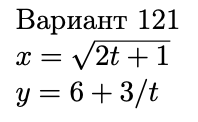

't -> 0'

1

(6 + 3/t, t, 0)

't -> +oo'

oo

6

<ipython-input-47-cfd3234523b7>:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot((6*T)/(T**3 + 8), (4*T**2)/(T**3 + 8), color='green')


(-0.5, 5.0)

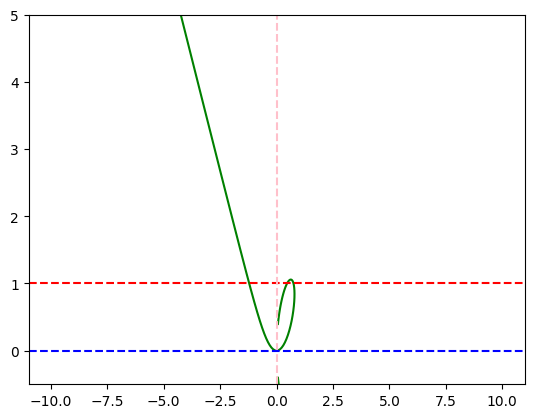

In [47]:
t = Symbol('t')
x = (2 * t + 1)**(1/2)
y = 6 + 3 / t
display('t -> 0', limit(x, t, 0), (y, t, 0))
display('t -> +oo', limit(x, t, +sympy.oo), limit(y, t, +sympy.oo))
T1 = np.linspace(-10, -0.1, 100)
T2 = np.linspace(0.1, 10, 100)
for T in [T1, T2]:
    plt.plot((6*T)/(T**3 + 8), (4*T**2)/(T**3 + 8), color='green')
plt.axhline(y=1, color='red', linestyle='--')
plt.axvline(x=0, color='pink', linestyle='--')
plt.axhline(y=0, color='blue', linestyle='--')
plt.ylim(-0.5, 5)